In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
len(df)

891

<Axes: >

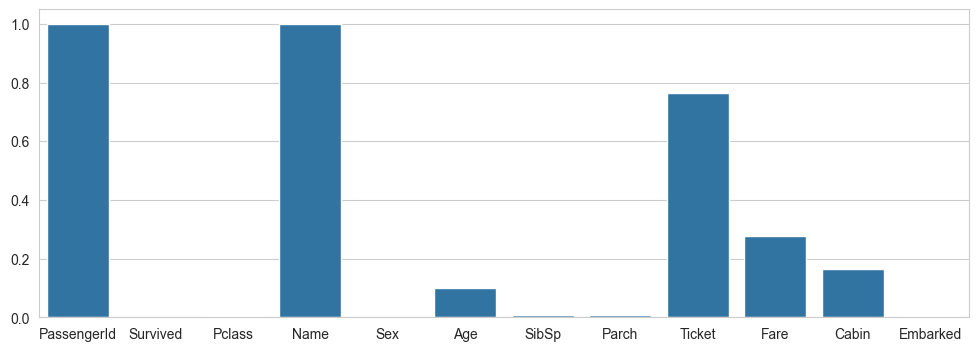

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
sns.barplot(df.nunique() / len(df), ax=ax)

In [9]:
df["DuplicateTickets"] = df.Ticket.apply(lambda t: (df.Ticket == t).sum())

In [11]:
df2 = df.drop(columns=["PassengerId", "Name", "Ticket"])

<Axes: ylabel='Count'>

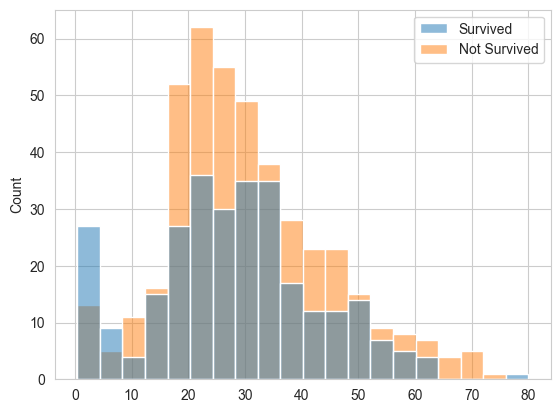

In [13]:
sns.histplot(data={"Survived": df2[["Age", "Survived"]][df2.Survived==1].Age,
                   "Not Survived": df2[["Age", "Survived"]][df2.Survived==0].Age,
                   })

In [42]:
df2.Age = df2.Age.fillna(df2.Age.mean())

In [52]:
df2["HasCabin"]=df2.Cabin.isnull()

In [81]:
df2 = df2.drop(columns=["Cabin"])

In [78]:
df2.Sex = df2.Sex.apply(lambda s: {"male":0, "female":1}[s] )

In [103]:
df2.Embarked = df2.Embarked.fillna("S")

In [106]:
df2.isna().sum()

Survived            0
Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Fare                0
Embarked            0
DuplicateTickets    0
HasCabin            0
dtype: int64

In [109]:
df2.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [111]:
df2.Embarked = df2.Embarked.apply(lambda s: {"S":0, "C":1, "Q":2}[s])

In [112]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,DuplicateTickets,HasCabin
0,0,3,0,22.000000,1,0,7.2500,0,1,True
1,1,1,1,38.000000,1,0,71.2833,1,1,False
2,1,3,1,26.000000,0,0,7.9250,0,1,True
3,1,1,1,35.000000,1,0,53.1000,0,2,False
4,0,3,0,35.000000,0,0,8.0500,0,1,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,1,True
887,1,1,1,19.000000,0,0,30.0000,0,1,False
888,0,3,1,29.699118,1,2,23.4500,0,2,True
889,1,1,0,26.000000,0,0,30.0000,1,1,False
